# Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, LogisticRegression



# Armar un dataframe

In [2]:
df = pd.read_csv('weatherAUS.csv')
df_subset = df.iloc[:,1:]

# Vistazo rapido del dataframe

In [3]:
df_subset.head()



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [4]:
df_subset.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
145407,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0
145411,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,0.0


In [5]:
df_subset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [6]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              145412 non-null  object 
 1   Location          145412 non-null  object 
 2   MinTemp           143928 non-null  float64
 3   MaxTemp           144159 non-null  float64
 4   Rainfall          142152 non-null  float64
 5   Evaporation       82658 non-null   float64
 6   Sunshine          75616 non-null   float64
 7   WindGustDir       135096 non-null  object 
 8   WindGustSpeed     135159 non-null  float64
 9   WindDir9am        134850 non-null  object 
 10  WindDir3pm        141186 non-null  object 
 11  WindSpeed9am      143645 non-null  float64
 12  WindSpeed3pm      142351 non-null  float64
 13  Humidity9am       142759 non-null  float64
 14  Humidity3pm       140907 non-null  float64
 15  Pressure9am       130351 non-null  float64
 16  Pressure3pm       13

# Ver las columnas e identificar cada una

In [7]:
df_subset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

25 Columnas

**Unnamed** Indices (no esta en df_subset)

**Date** fecha de la observacion

**Location** Nombre del lugar donde esta la estacion meteorologica

**MinTemp** Temperatura minima. En grados celsius

**MaxTemp** Temperatura maxima. En grados celsius

**Rainfall** cantidad de lluvia registrada en el dia. En mm

**Evaporation** evaporacion (mm) de 00 a 09am.

**Sunshine** Numero de horas de luz solar durante el dia.

**WindGustDir** direccion de la rafaga de viento mas fuerte en las 24 horas

**WindGustSpeed** velocidad de la rafaga de viento mas fuerte en km/h

**WindDir9am** direccion del viento a las 9 am

**WindDir3pm** direccion del viento a las 3 pm

**WindSpeed9am** velocidad del viento en km/h, a las 9 am

**WindSpeed3pm** velocidad del viento en km/h, a las 3 pm

**Humidity9am** humedad en porcentaje a las 9 am

**Humidity3pm** humedad en porcentaje a las 3 pm

**Pressure9am** presion atmosferica en (hpa) al nivel del mar a las 9 am

**Pressure9am** presion atmosferica en (hpa) al nivel del mar a las 3 pm

**Cloud9am** Fraccion del cielo oscurecida por nubes medida en fracciones de 8 (0 indica sin nubes, 8 totalmente nublado) a las 9 am

**Cloud9am** Fraccion del cielo oscurecida por nubes medida en fracciones de 8 (0 indica sin nubes, 8 totalmente nublado) a las 3pm

**Temp9am** temperatura en grados celsius a las 9 am

**Temp3pm** temperatura en grados celsius a las 3 pm

**RainToday** valor booleano si llovio o no durante el dia (1 si pasa 1 mm)

**RainTomorrow** Cantidad de lluvia al dia siguiente en mm

**RainfallTomorrow** cantidad de lluvia al dia siguiente en mm

# Que no voy a usar
Date No se va a usar
Localization sera descartada


In [8]:
df_subset = df_subset.drop(['Date'], axis=1)

# Que valores son numericos y cuales son categoricos

In [9]:
def num_or_cat(df):
    categorical = df.select_dtypes(include='object').columns
    numerical = df.select_dtypes(exclude='object').columns

    return(categorical, numerical)

In [10]:
categorical_cols, numerical_cols= num_or_cat(df_subset)


In [11]:
categorical_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [12]:
numerical_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow'],
      dtype='object')

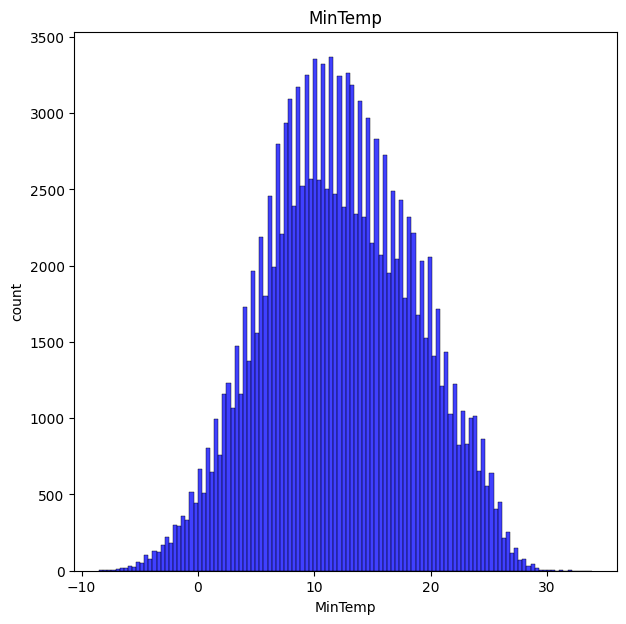

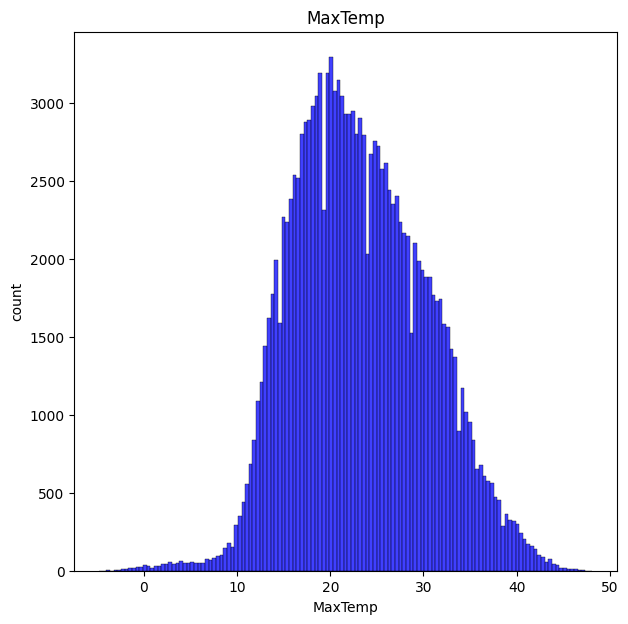

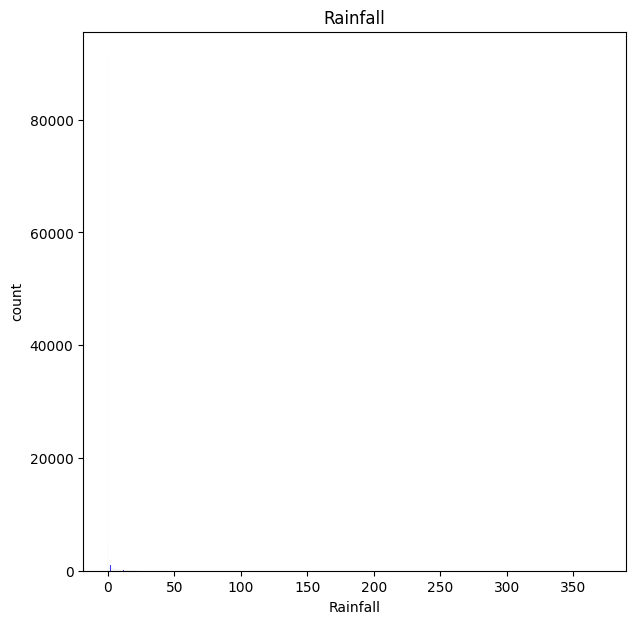

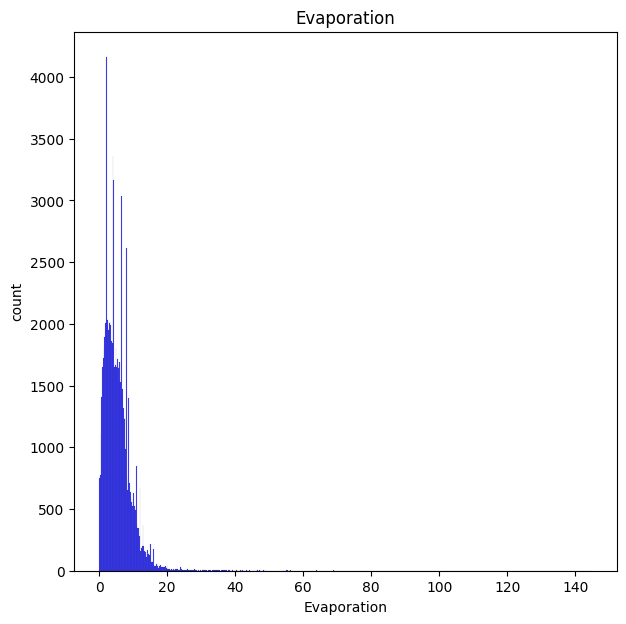

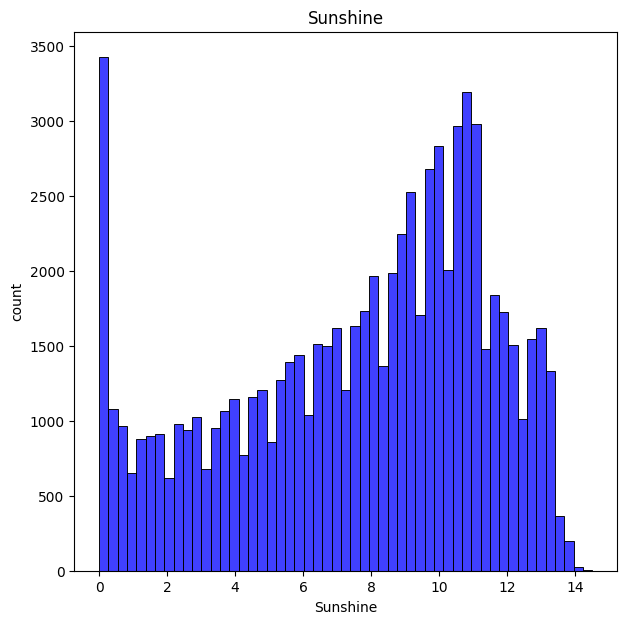

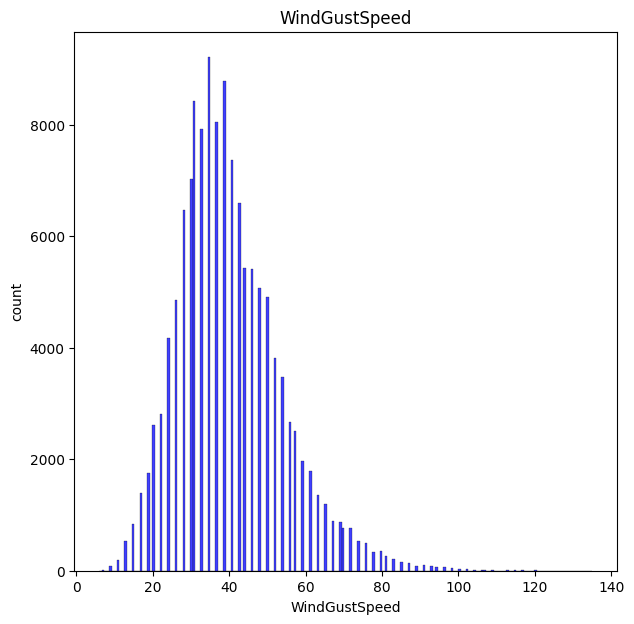

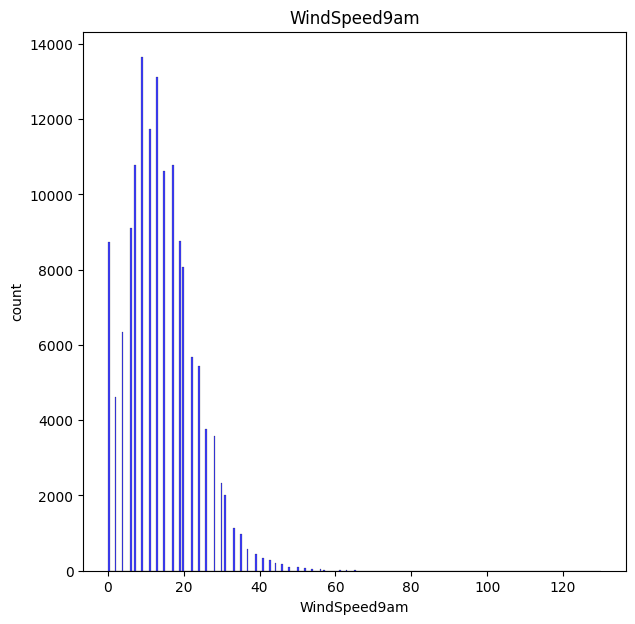

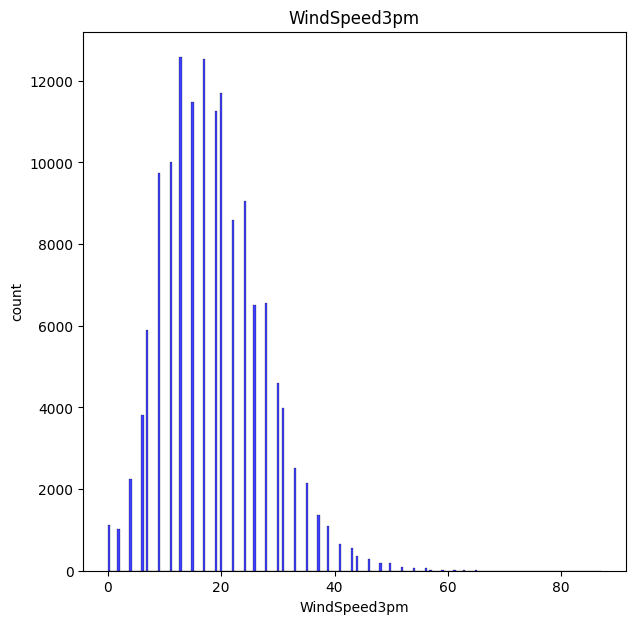

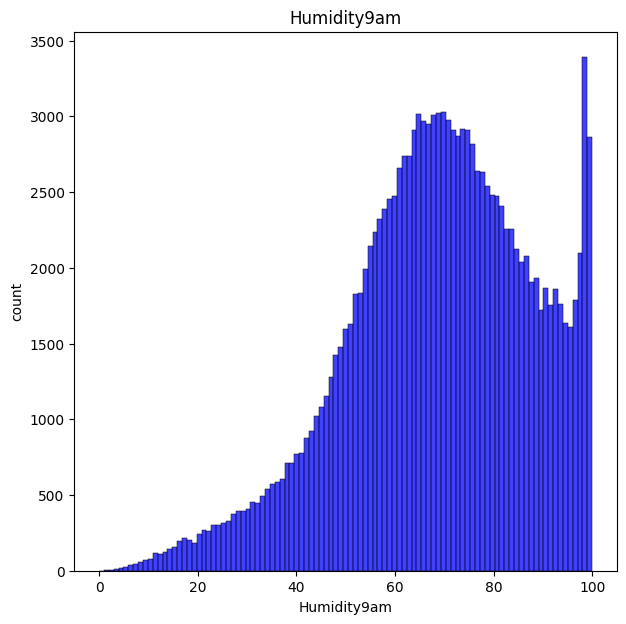

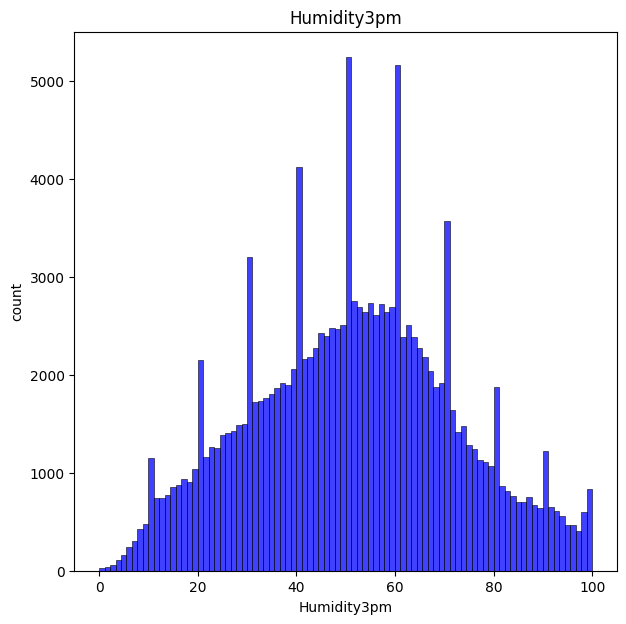

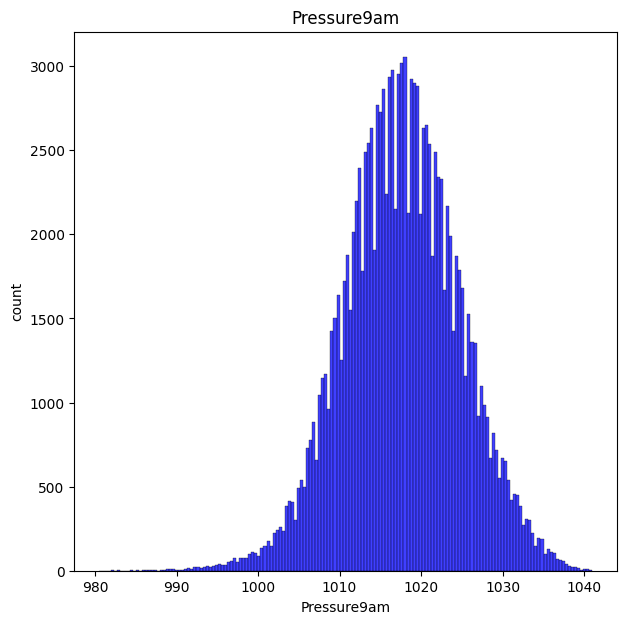

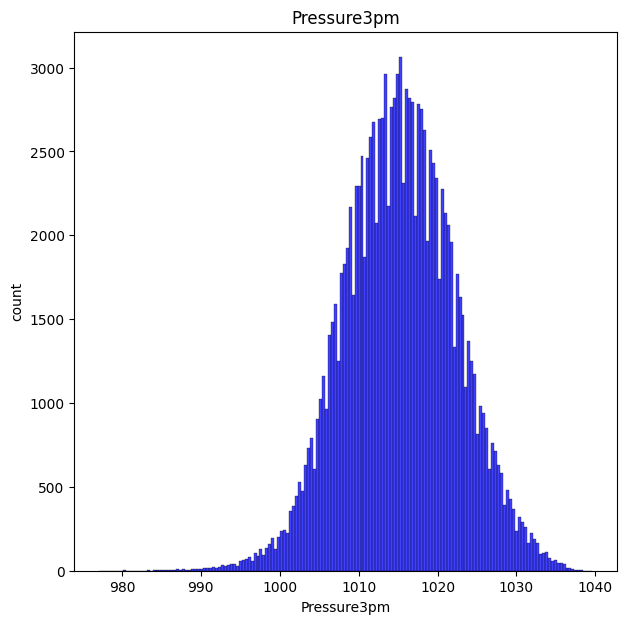

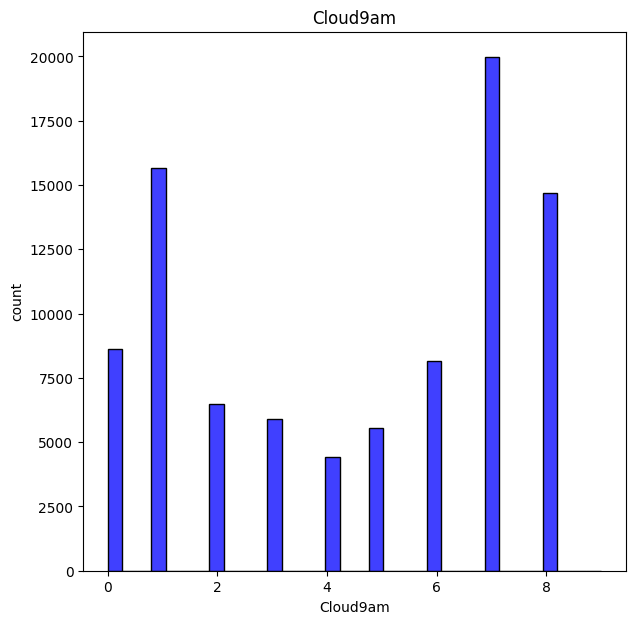

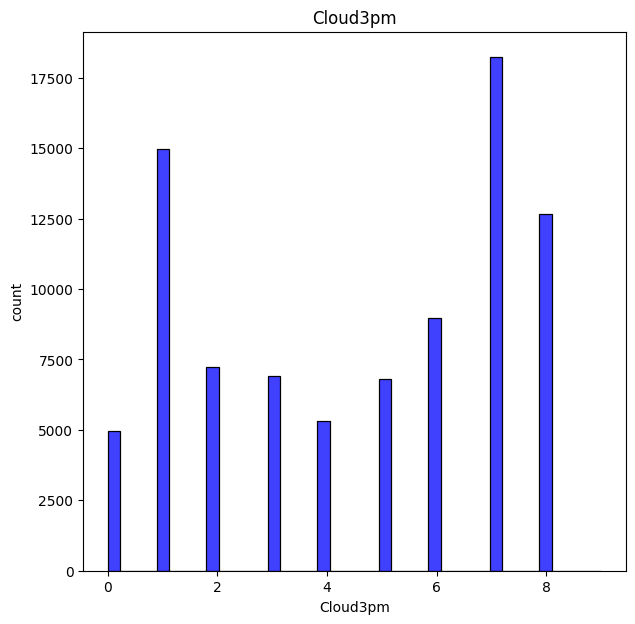

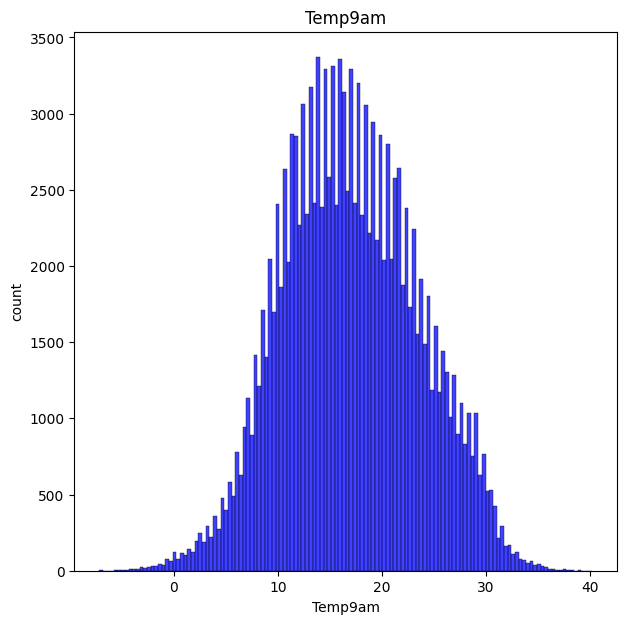

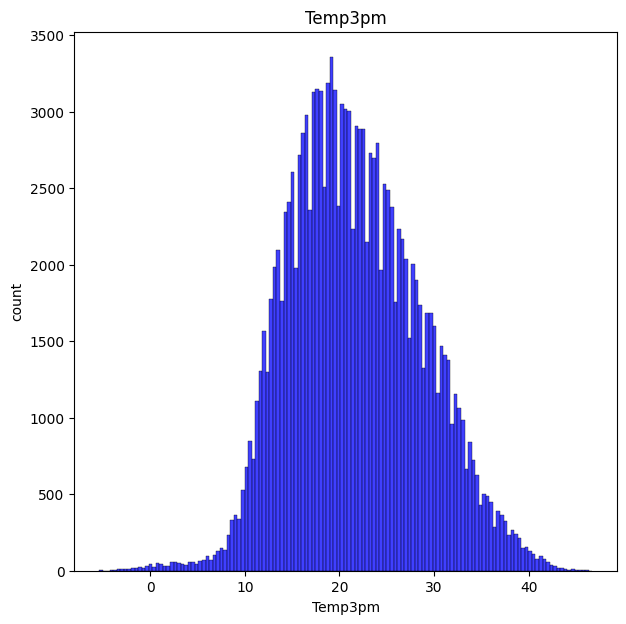

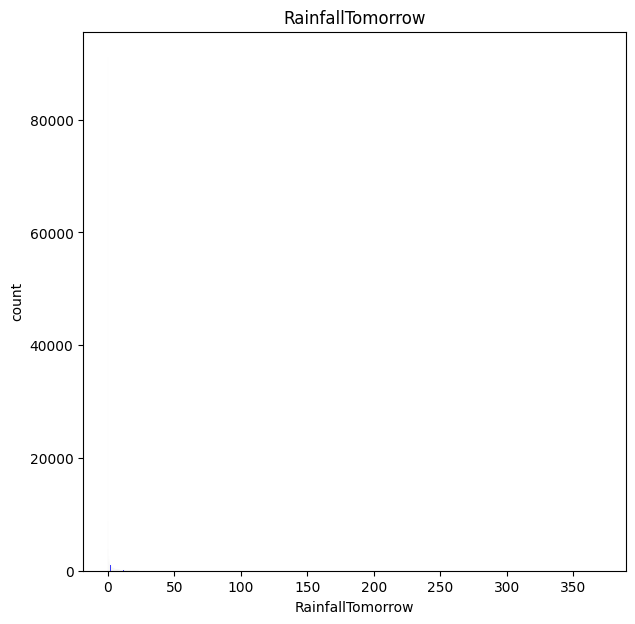

In [13]:
for i in range(len(numerical_cols)):
    plt.figure(figsize=(7,7))
    sns.histplot(df_subset[numerical_cols[i]], color="blue")
    label=numerical_cols[i]
    plt.xlabel(numerical_cols[i])
    plt.ylabel("count")
    plt.title(label)

# Contando valores faltantes

In [14]:
df_subset.isnull().sum()

Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

# llenar columnas numericas

In [15]:
bimodales =  ['Sunshine', 'Humidity9am', 'Cloud9am', 'Cloud3pm']
numerical_cols_copy = [elemento for elemento in numerical_cols if elemento not in bimodales]



In [16]:
imputerResto = SimpleImputer(missing_values=np.nan, strategy="median", fill_value=None)

for columna in bimodales:
    df_subset[columna] = imputerResto.fit_transform(df_subset[[columna]])

In [17]:
imputerResto = SimpleImputer(missing_values=np.nan, strategy="mean", fill_value=None)

for columna in numerical_cols_copy:
    df_subset[columna] = imputerResto.fit_transform(df_subset[[columna]])

In [18]:
df_subset.isnull().sum()

Location                0
MinTemp                 0
MaxTemp                 0
Rainfall                0
Evaporation             0
Sunshine                0
WindGustDir         10316
WindGustSpeed           0
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am            0
WindSpeed3pm            0
Humidity9am             0
Humidity3pm             0
Pressure9am             0
Pressure3pm             0
Cloud9am                0
Cloud3pm                0
Temp9am                 0
Temp3pm                 0
RainToday            3260
RainTomorrow         3259
RainfallTomorrow        0
dtype: int64

Capaz saque rainfall tomorrow del loop

# Cambiar Datos categoricos

En el caso de las columnas RainToday y RainTomorrow pasar Yes a 1 y no a 0

In [19]:
categorical_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [20]:
df_subset['RainToday']=df_subset['RainToday'].fillna('No')
df_subset['RainTomorrow']=df_subset['RainTomorrow'].fillna('No')


# El resto de columnas categoricas reemplazar valores faltantes por la moda

In [21]:
df_subset['WindGustDir'] = df_subset['WindGustDir'].fillna(df_subset['WindGustDir'].mode()[0])
df_subset['WindDir9am'] = df_subset['WindDir9am'].fillna(df_subset['WindDir9am'].mode()[0])
df_subset['WindDir3pm'] = df_subset['WindDir3pm'].fillna(df_subset['WindDir3pm'].mode()[0])

# ----------------------------------------------------------------------------------------------------

# Graficar datos numericos

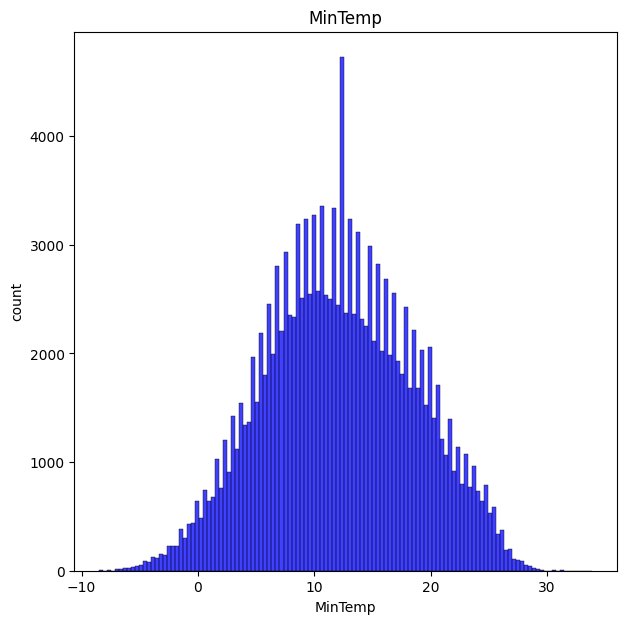

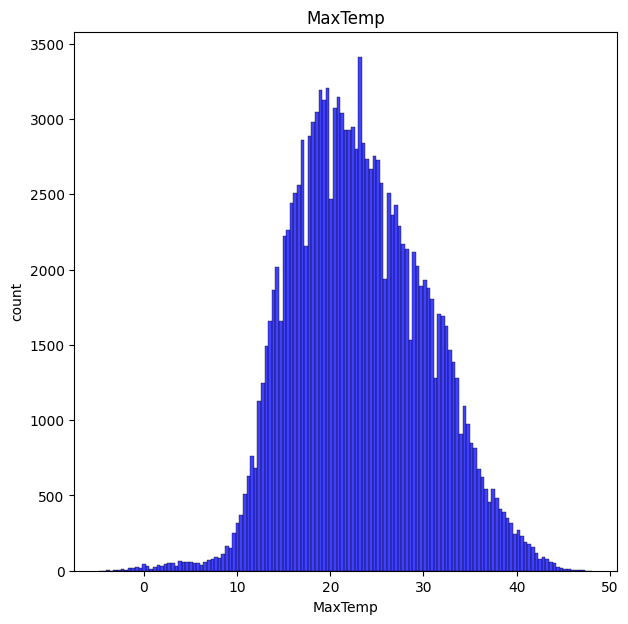

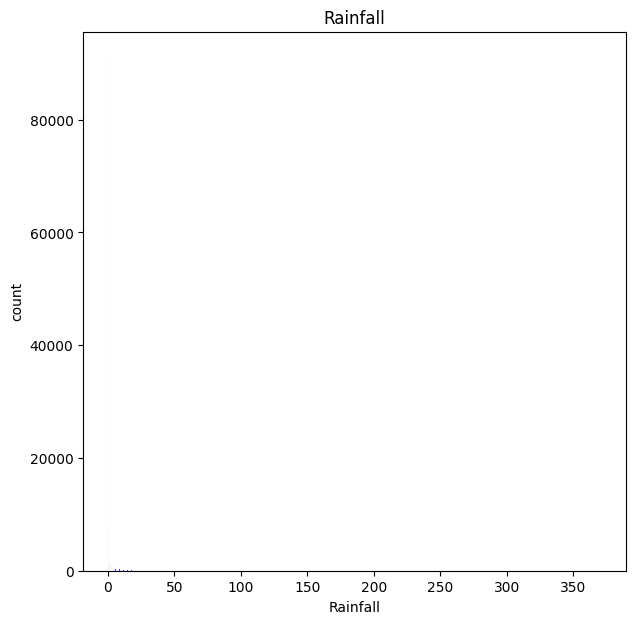

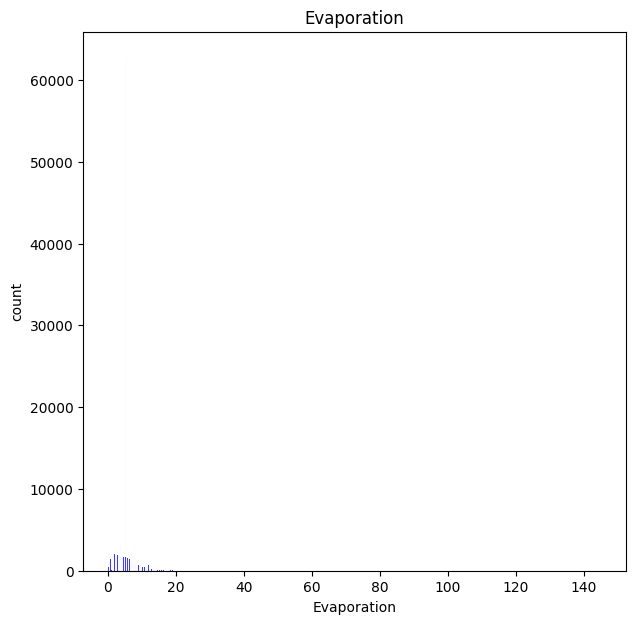

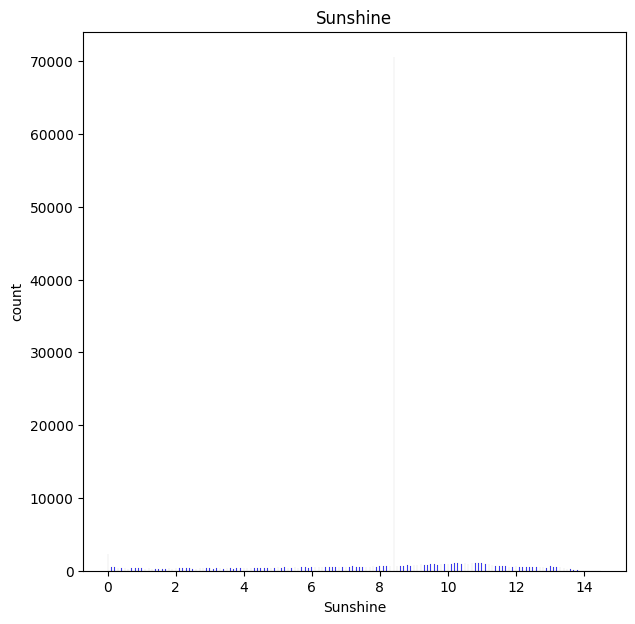

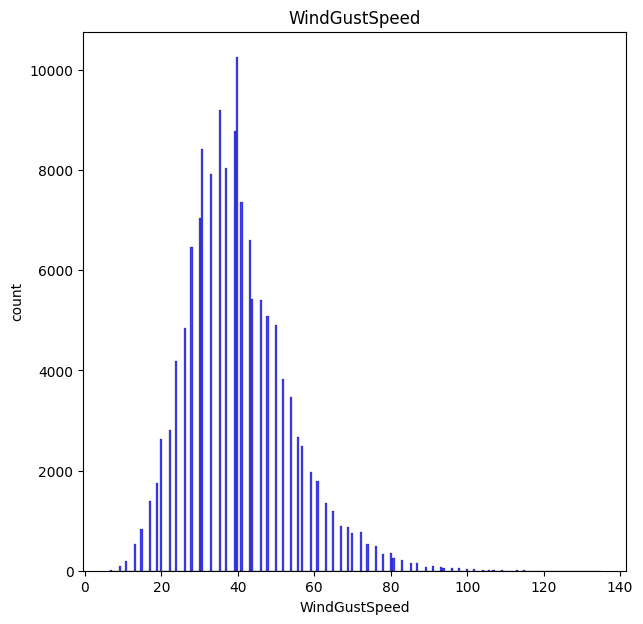

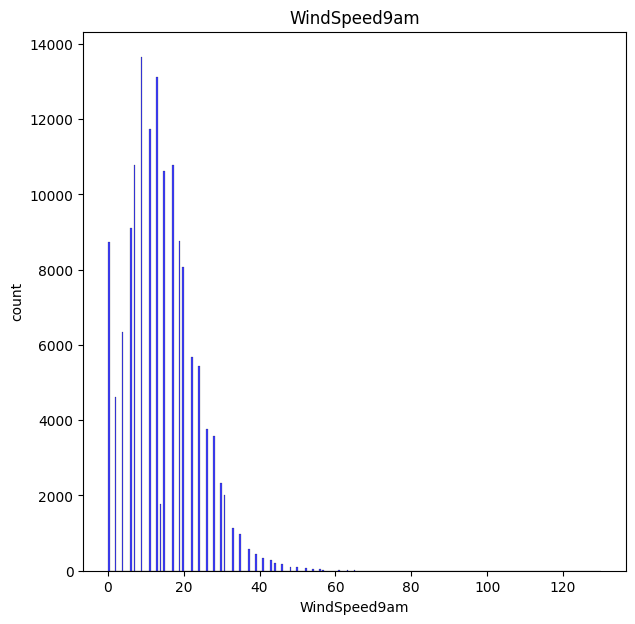

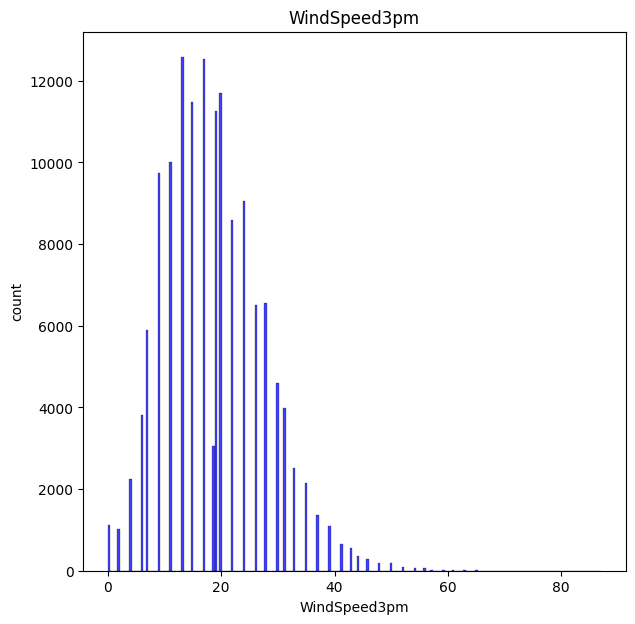

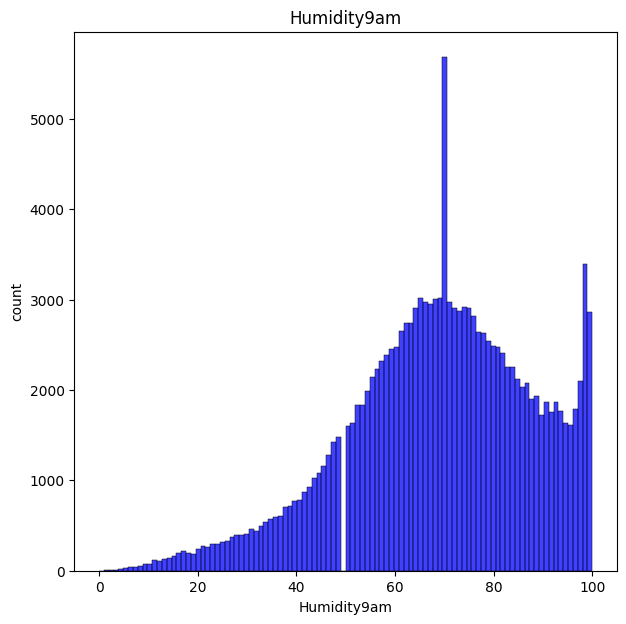

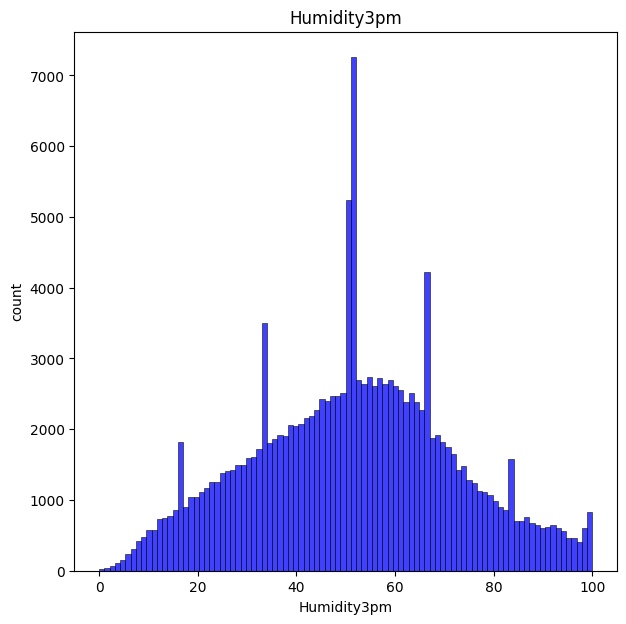

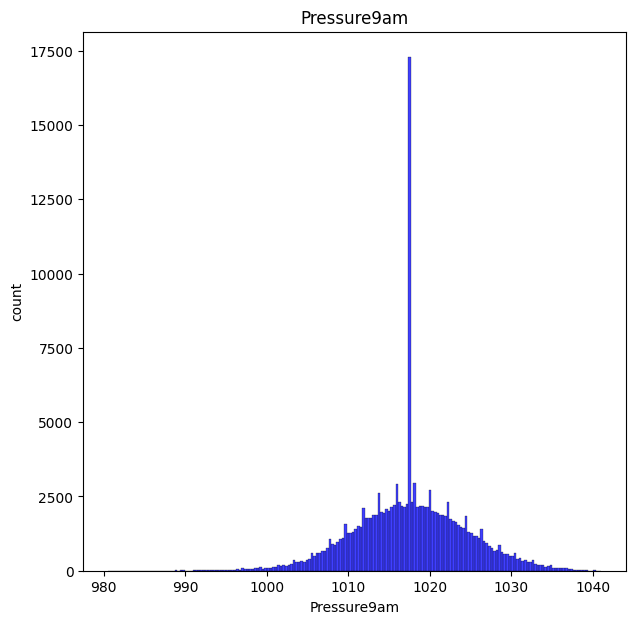

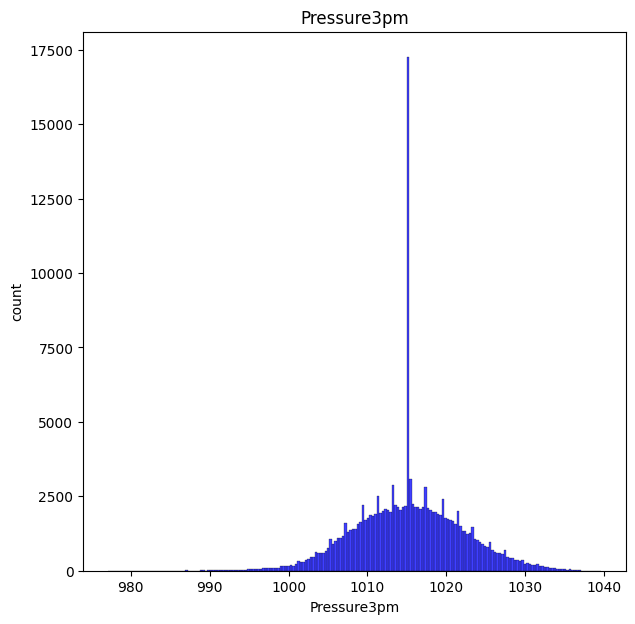

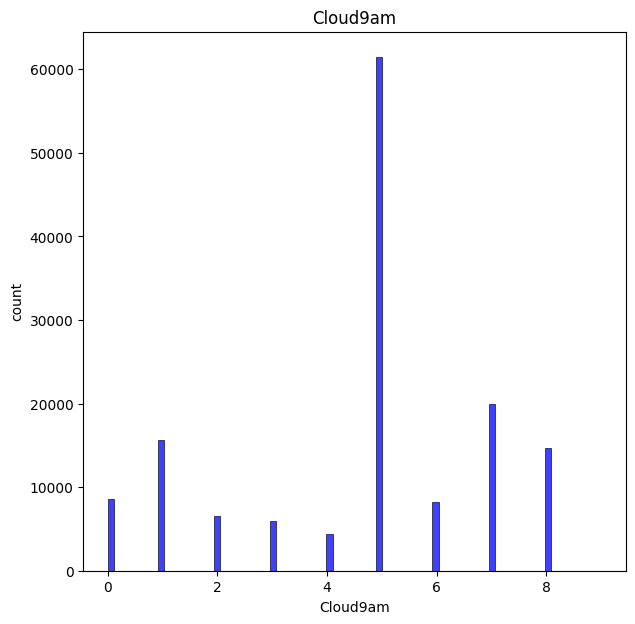

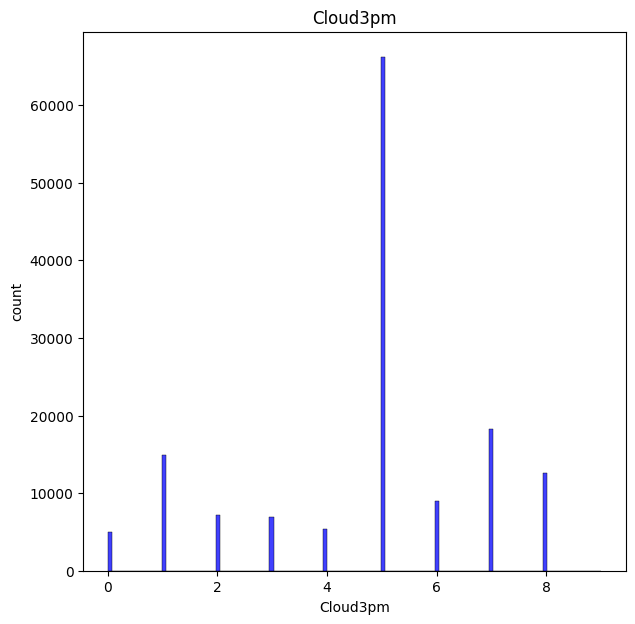

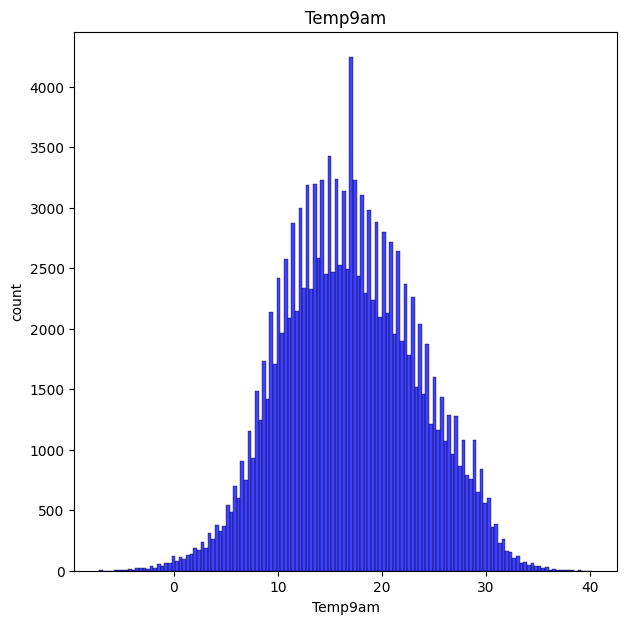

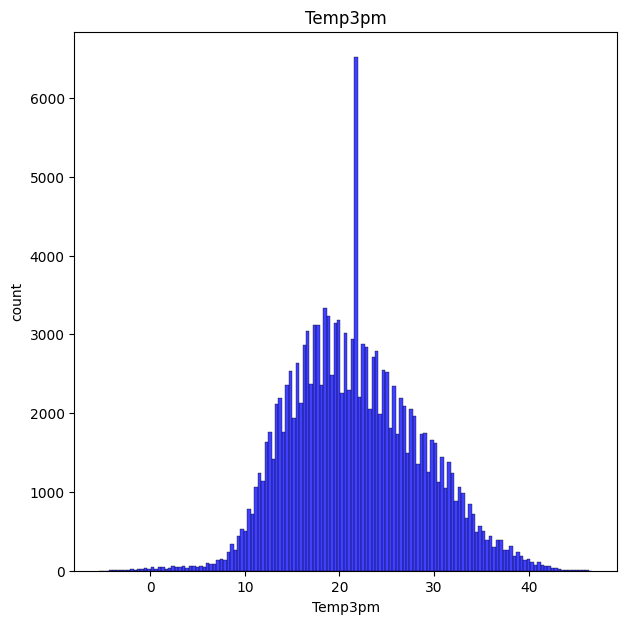

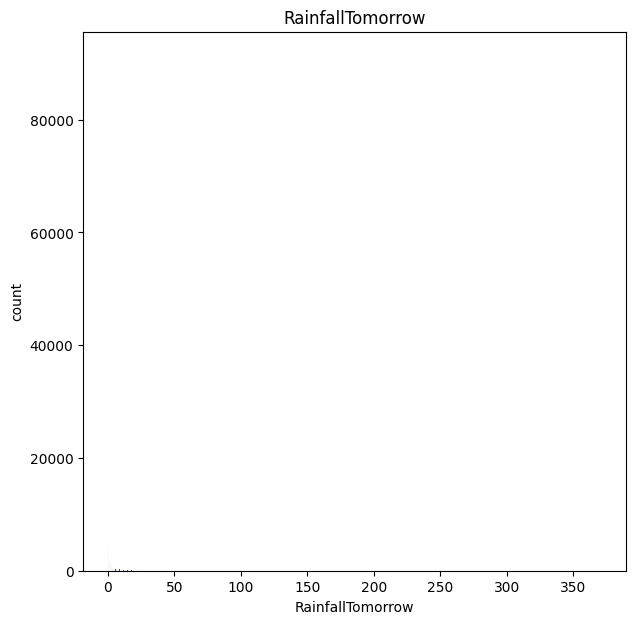

In [22]:
for i in range(len(numerical_cols)):
    plt.figure(figsize=(7,7))
    sns.histplot(df_subset[numerical_cols[i]], color="blue")
    label=numerical_cols[i]
    plt.xlabel(numerical_cols[i])
    plt.ylabel("count")
    plt.title(label)



# Graficar Categoricos


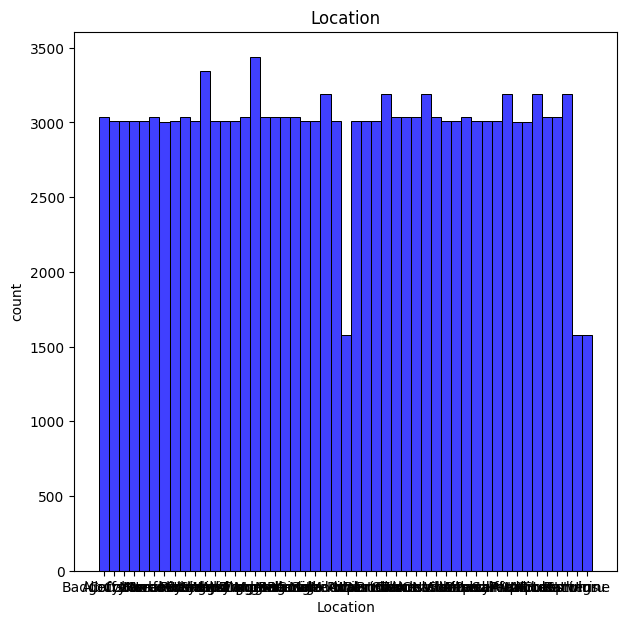

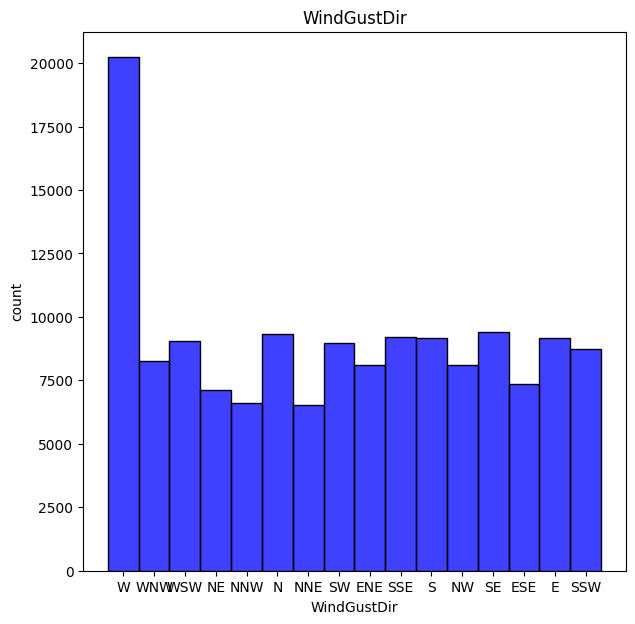

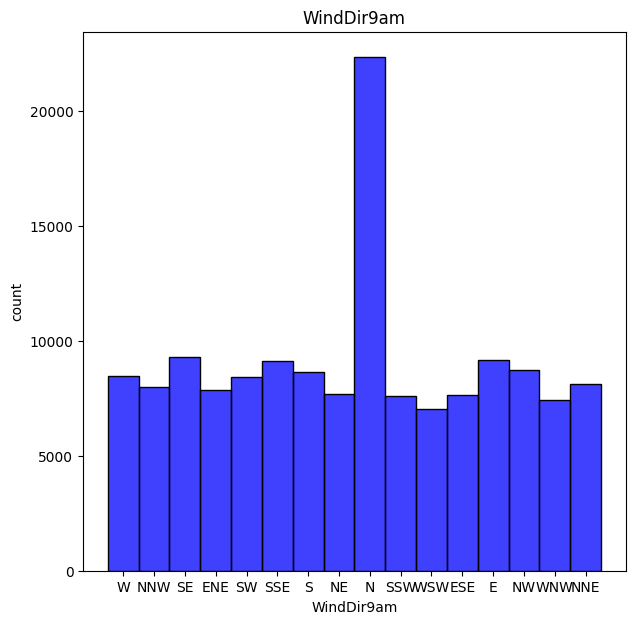

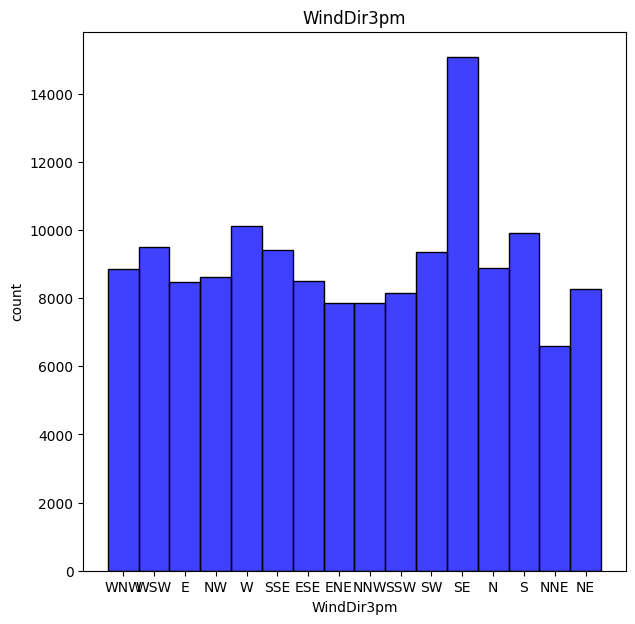

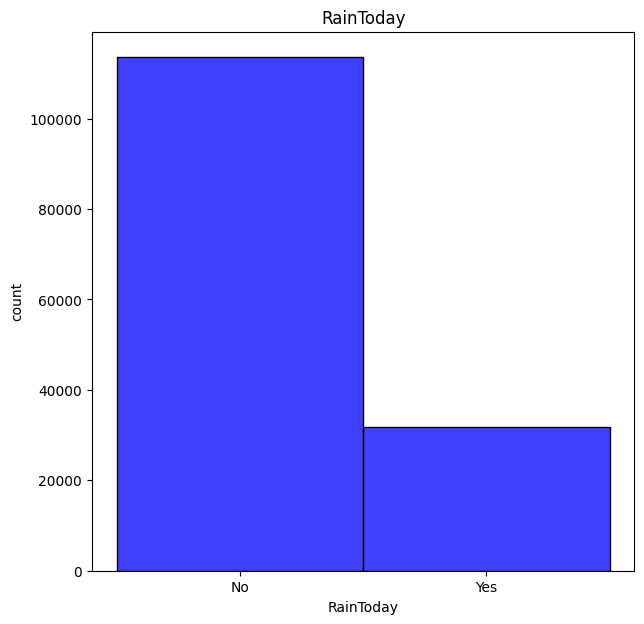

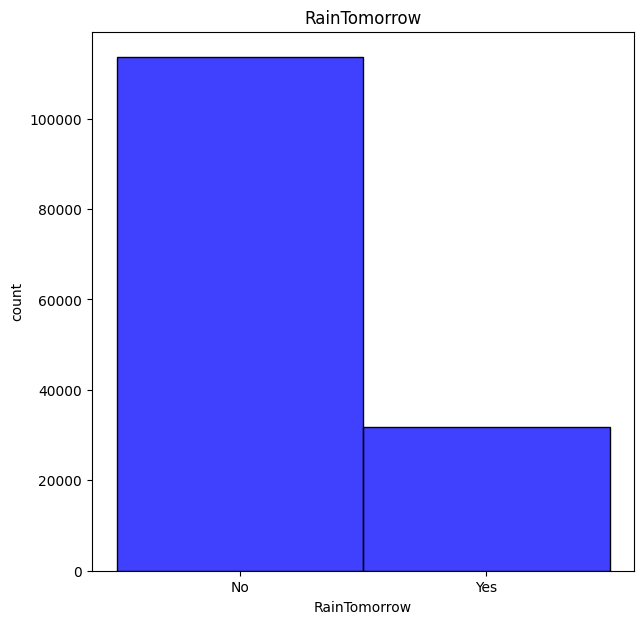

In [23]:
for i in range(len(categorical_cols)):
    plt.figure(figsize=(7,7))
    sns.histplot(df_subset[categorical_cols[i]], color="blue")
    label=categorical_cols[i]
    plt.xlabel(categorical_cols[i])
    plt.ylabel("count")
    plt.title(label)

In [24]:
df_subset.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

# Check si esta balanceado

no esta balanceado (por mas que ya haya reemplazado lso valores faltantes sigue estando desbalanceado)

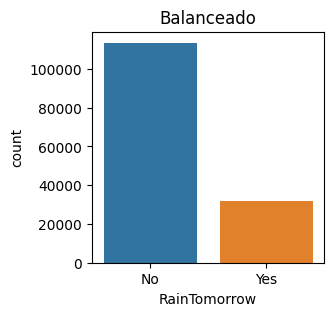

In [25]:
plt.figure(figsize=(3,3))
sns.countplot(x=df_subset['RainTomorrow'])
plt.title("Balanceado")
plt.show()

# Preparar dataset

In [26]:
copia_df = df_subset.copy()

# Codear los datos categoricos

In [27]:
le = LabelEncoder()
for columna in categorical_cols:
    copia_df[columna] = le.fit_transform(copia_df[columna])

# Hacer matriz de correlacion

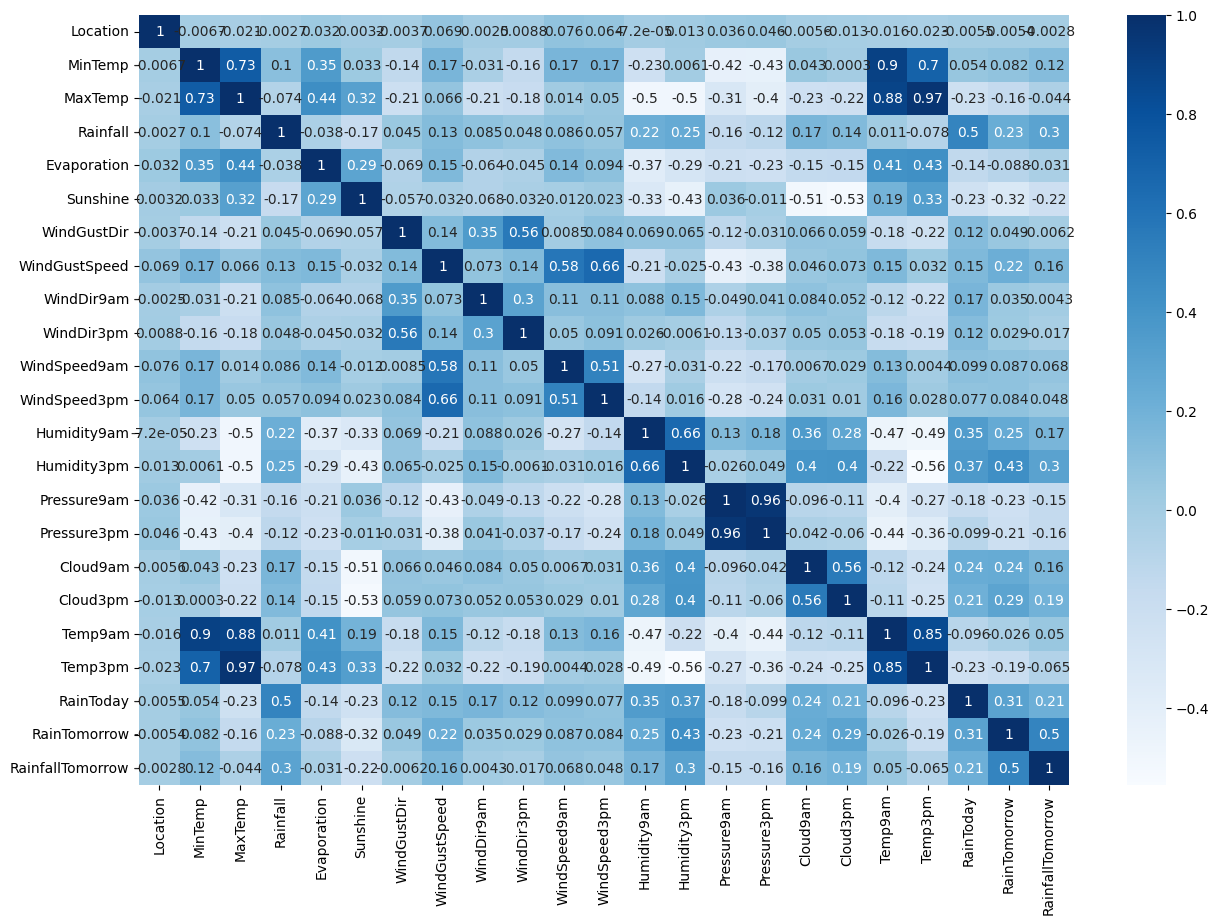

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(copia_df.corr(),annot=True, cmap="Blues")
plt.show()

In [29]:
copia_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2,13.4,22.9,0.6,5.468616,8.4,13,44.0,13,14,...,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,0.0
1,2,7.4,25.1,0.0,5.468616,8.4,14,44.0,6,15,...,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,0.0
2,2,12.9,25.7,0.0,5.468616,8.4,15,46.0,13,15,...,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,0.0
3,2,9.2,28.0,0.0,5.468616,8.4,4,24.0,9,0,...,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,1.0
4,2,17.5,32.3,1.0,5.468616,8.4,13,41.0,1,7,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,0.2


# Dividir en train test

In [30]:
copia_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,2,13.4,22.9,0.6,5.468616,8.4,13,44.0,13,14,...,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,0.0
1,2,7.4,25.1,0.0,5.468616,8.4,14,44.0,6,15,...,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,0.0
2,2,12.9,25.7,0.0,5.468616,8.4,15,46.0,13,15,...,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,0.0
3,2,9.2,28.0,0.0,5.468616,8.4,4,24.0,9,0,...,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,1.0
4,2,17.5,32.3,1.0,5.468616,8.4,13,41.0,1,7,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,0.2


In [31]:
X = copia_df.iloc[:,:-2].values

In [32]:
y = copia_df['RainfallTomorrow']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
X_test

array([[38. , 20.2, 28.7, ..., 23.7, 26.6,  0. ],
       [15. ,  4.2, 14.5, ...,  7.9, 12.4,  0. ],
       [37. , 16.1, 26.8, ..., 18.7, 26.7,  0. ],
       ...,
       [13. , 25.9, 33.6, ..., 30.5, 33.1,  0. ],
       [33. ,  5.1, 14.3, ...,  8.7, 13.8,  1. ],
       [30. ,  7.6, 25.6, ..., 16.6, 24.7,  0. ]])

# Crear los modelos de regression lasso ridge elasticnet y gradiente

In [35]:
regressor = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)  
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
grad = SGDRegressor(max_iter=1000)

# Normalizar los datos

In [36]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Predecir

In [37]:
regressor.fit(X_train_scaled, y_train) #Regresion lineal
lasso.fit(X_train_scaled, y_train) #Lasso
ridge.fit(X_train_scaled, y_train) #Ridge
elasticnet.fit(X_train_scaled,y_train) #elasticnet
grad.fit(X_train_scaled, y_train) #gradiente estocastico



SGDRegressor()

In [38]:
y_pred = grad.predict(X_test_scaled)
y_pred.shape

(36353,)

# R^2

In [39]:
r_squared = r2_score(y_test, y_pred)

print("R2:", r_squared)

R2: 0.19851245546534013


# Pruebas

In [40]:
r_squared = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2:", r_squared)
print("Mean Abs Precentage error:", mape)
print("Mean Sq Error", mse)
print("Mean Abs Error", mae)

R2: 0.19851245546534013
Mean Abs Precentage error: 6035833114001044.0
Mean Sq Error 58.48618563605508
Mean Abs Error 3.495174606751852


# Regresion Logistica usando (Rain tomorrow)

In [ ]:
X_log = copia_df.iloc[:,:-1].values
y_log = copia_df['RainTomorrow']
X_train_log,X_test_log,y_train_log,y_test_log = train_test_split(X_log,y_log,test_size=0.25,random_state=42)
reg_log = LogisticRegression()

scaler_log = StandardScaler()
scaler_log.fit(X_train_log)
X_train_scaled_log = scaler_log.transform(X_train_log)
X_test_scaled_log = scaler_log.transform(X_test_log)

reg_log.fit(X_train_scaled_log, y_train_log) #Regresion logistica